In [1]:
## Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def clean_and_save_individual_sheets(sales_data, marketing_data, feedback_data, competitor_data, output_file):
    with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
        # sales Data Pre-processing
        if 'Revenue' in sales_data.columns and 'Cost_of_Goods_Sold' in sales_data.columns:
            sales_data['Profit'] = sales_data['Revenue'] - sales_data['Cost_of_Goods_Sold']
        
        sales_data['Revenue'].fillna(sales_data['Revenue'].mean(), inplace=True)
        sales_data['Cost_of_Goods_Sold'].fillna(sales_data['Cost_of_Goods_Sold'].mean(), inplace=True)
        sales_data['Profit'].fillna(sales_data['Profit'].mean(), inplace=True)
        sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')
        sales_data = sales_data.drop_duplicates()
        for col in ['Country', 'Zone']:
            sales_data[col] = sales_data[col].str.strip().str.title()
        
        sales_data.dropna(subset=['Country', 'Zone'], inplace=True)
        sales_data.to_excel(writer, sheet_name='Sales Data', index=False)

        # Marketing Data Pre-processing
        marketing_data['Marketing_Spend'].fillna(marketing_data['Marketing_Spend'].mean(), inplace=True)
        marketing_data['Customer_Reach'].fillna(marketing_data['Customer_Reach'].mean(), inplace=True)
        marketing_data['Date'] = pd.to_datetime(marketing_data['Date'], errors='coerce')
        marketing_data = marketing_data.drop_duplicates()
        for col in ['Country', 'Zone']:
            marketing_data[col] = marketing_data[col].str.strip().str.title()

        marketing_data.dropna(subset=['Country', 'Zone'], inplace=True)
        marketing_data.to_excel(writer, sheet_name='Marketing Data', index=False)

        # Feedback Data Pre-processing
        feedback_data['Volume_of_Feedback'].fillna(feedback_data['Volume_of_Feedback'].mean(), inplace=True)
        feedback_data['Customer_Rating'].fillna(feedback_data['Customer_Rating'].mean(), inplace=True)
        feedback_data['Date'] = pd.to_datetime(feedback_data['Date'], errors='coerce')
        feedback_data = feedback_data.drop_duplicates()
        for col in ['Country', 'Zone']:
            feedback_data[col] = feedback_data[col].str.strip().str.title()

        feedback_data.dropna(subset=['Country', 'Zone'], inplace=True)
        feedback_data.to_excel(writer, sheet_name='Feedback Data', index=False)

        # Competitor Data Pre-processing
        competitor_data['Competitor_Price'].fillna(competitor_data['Competitor_Price'].mean(), inplace=True)
        competitor_data['Competitor_Market_Share'].fillna(competitor_data['Competitor_Market_Share'].mean(), inplace=True)
        competitor_data = competitor_data.drop_duplicates()
        for col in ['Country', 'Zone']:
            competitor_data[col] = competitor_data[col].str.strip().str.title()

        competitor_data.dropna(subset=['Country', 'Zone'], inplace=True)
        competitor_data.to_excel(writer, sheet_name='Competitor Data', index=False)
        
    return output_file

In [3]:
## Data Merging of the Clean Data and Saving the data in a new CSV file

# sales_data = pd.read_excel("cleaned_individual_sheets.xlsx", sheet_name="Sales Data")
# marketing_data = pd.read_excel("cleaned_individual_sheets.xlsx", sheet_name="Marketing Data")
# feedback_data = pd.read_excel("cleaned_individual_sheets.xlsx", sheet_name="Feedback Data")
# competitor_data = pd.read_excel("cleaned_individual_sheets.xlsx", sheet_name="Competitor Data")

# merged_data = pd.merge(sales_data, marketing_data, on=["Country", "Zone", "Date"], how="left")
# merged_data = pd.merge(merged_data, feedback_data, on=["Country", "Zone", "Product_Category", "Date"], how="left")
# merged_data = pd.merge(
#     merged_data,
#     competitor_data.rename(columns={"Competitor_Product_Category": "Product_Category"}),
#     on=["Country", "Zone", "Product_Category"],
#     how="left")

# # Save as CSV file
# merged_data.to_csv("Merged_Dataset.csv", index=False)

# print("Data has been saved as Merged_Dataset.csv.")

In [4]:
merged_data = pd.read_csv('Merged_Dataset.csv')
merged_data.head()

,Country,Zone,Product_ID,Product_Category,Units_Sold,Revenue,Cost_of_Goods_Sold,Date,Profit,Marketing_Spend,Campaign_Type,Customer_Reach,Brand_Awareness_Score,Customer_Rating,Feedback_Type,Volume_of_Feedback,Competitor_Name,Competitor_Price,Competitor_Market_Share
0,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,1908.81,7406.05,Traditional,48474.0,9.0,4.0,Positive,256.0,Competitor_A,1.46,24.03
1,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,1908.81,7406.05,Traditional,48474.0,9.0,4.0,Positive,256.0,Competitor_B,5.80,13.05
2,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,1908.81,7406.05,Traditional,48474.0,9.0,4.0,Positive,256.0,Competitor_A,8.23,39.87
3,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,1908.81,7406.05,Traditional,48474.0,9.0,4.0,Positive,256.0,Competitor_B,1.16,27.38
4,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,1908.81,7406.05,Traditional,48474.0,9.0,4.0,Positive,256.0,Competitor_B,3.37,37.35


In [5]:
## --- Profitability Analysis ---
def analyze_profitability(data):
    # Profit by zone
    profit_by_zone = data.groupby('Zone')['Profit'].sum()

    # Profit percentage
    profit_percentage = (profit_by_zone / profit_by_zone.sum()) * 100

    explode = [0, 0, 0.1, 0]
    
    custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        profit_percentage, 
        labels=profit_percentage.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=custom_colors, 
        explode=explode,  
        shadow=True,  
        wedgeprops={'edgecolor': 'black'}, 
        textprops={'fontsize': 12})
    plt.legend(profit_percentage.index, title="Zones", loc="upper right", bbox_to_anchor=(1.1, 1))
    plt.title("Profit Contribution by Zone (%)", fontsize=16)
    plt.show()

    # Profitability by Product Category
    profit_by_category = data.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)
    total_profit = profit_by_category.sum()
    profit_percentage = (profit_by_category / total_profit) * 100

    top_category = profit_by_category.idxmax()
    bottom_category = profit_by_category.idxmin()
    
    plt.figure(figsize=(10, 8))
    colors = sns.color_palette("coolwarm", len(profit_by_category))
    bars = plt.barh(profit_by_category.index, profit_percentage, color=colors)
    
    for idx, bar in enumerate(bars):
        profit_value = profit_by_category.iloc[idx]
        percentage = profit_percentage.iloc[idx]
        annotation = ""
        annotation_color = 'black'
        if profit_by_category.index[idx] == top_category:
            annotation = " [Highest]"
            annotation_color = 'green'
        elif profit_by_category.index[idx] == bottom_category:
            annotation = " [Lowest]"
            annotation_color = 'red'

        plt.text(
            bar.get_width(),  
            bar.get_y() + bar.get_height() / 2, 
            f'{percentage:.2f}%{annotation} ({profit_value:,.2f})',
            va='center', fontsize=10, fontweight='bold', color=annotation_color)

    plt.title("Profitability by Product Category (Percentage)", fontsize=16, pad=20)
    plt.xlabel("Profit Contribution (%)", fontsize=14)
    plt.ylabel("Product Category", fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.show()

    profit_by_category_country = data.groupby(['Product_Category', 'Country'])['Profit'].sum().unstack(fill_value=0)
    
    # Profit per Country and Product Category
    plt.figure(figsize=(14, 8))
    profit_by_category_country.plot(kind='bar', stacked=False, figsize=(14, 8), colormap='viridis')
    plt.title('Profit by Product Category and Country', fontsize=16)
    plt.xlabel('Product Category', fontsize=12)
    plt.ylabel('Profit ($)', fontsize=12)
    plt.legend(title='Country', fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

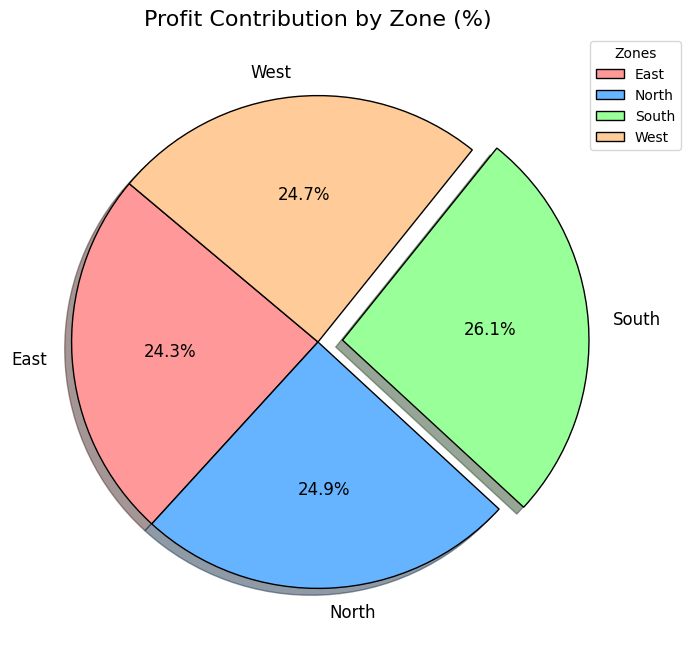

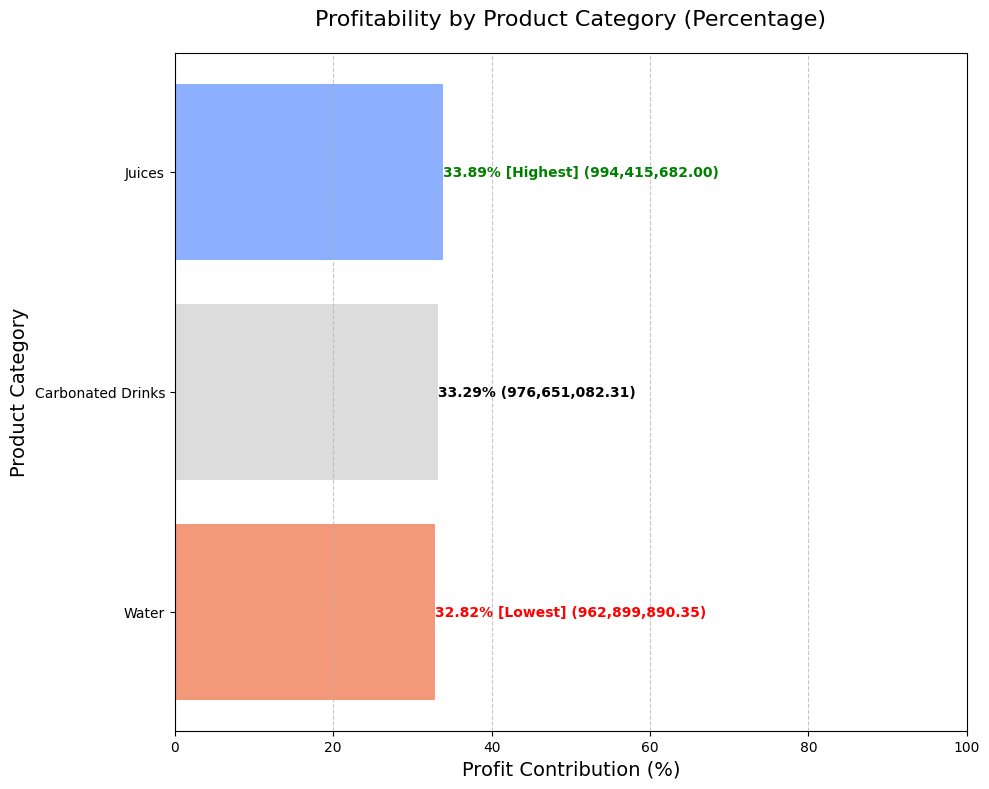

<Figure size 1400x800 with 0 Axes>

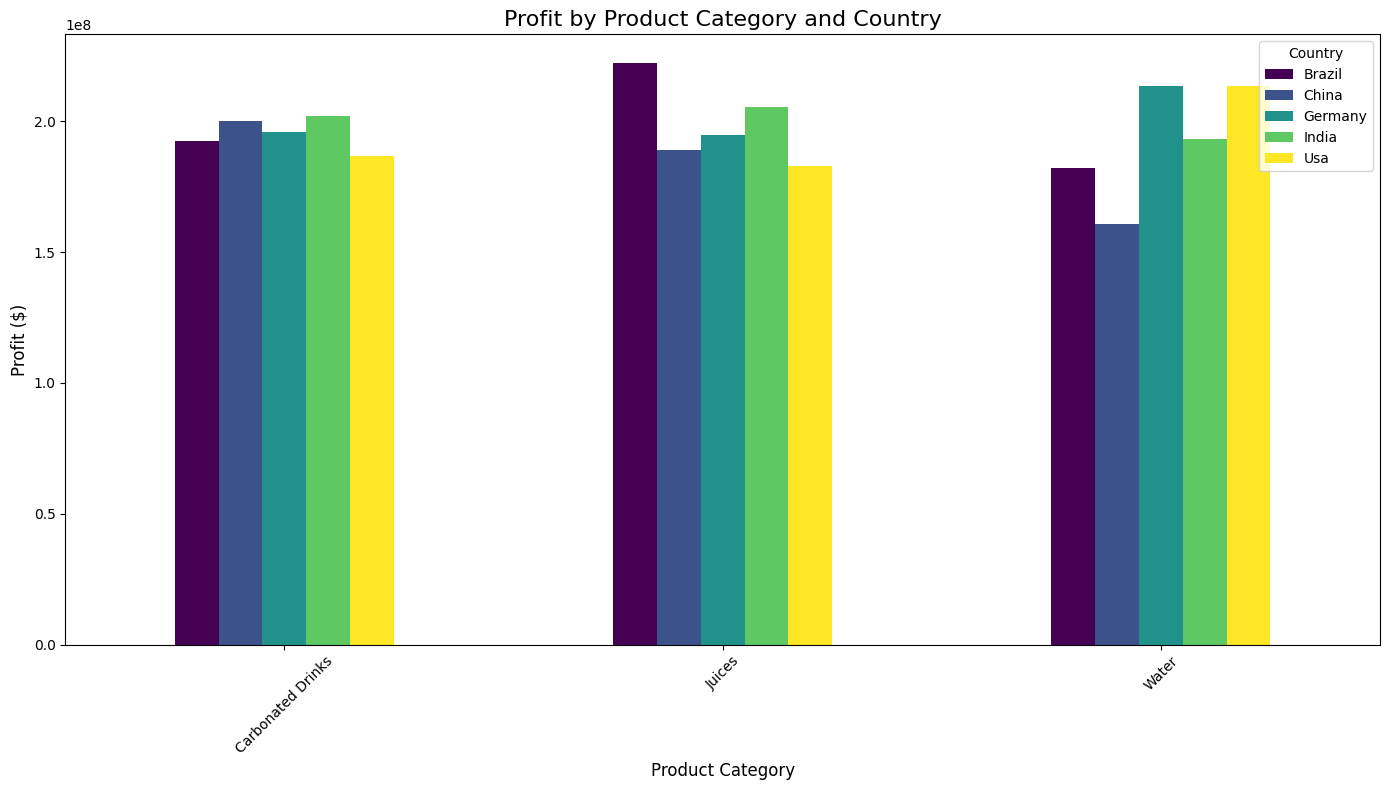

In [6]:
analyze_profitability(merged_data)

In [7]:
def analyze_brand(data):
    # Correlation
    correlation_matrix = data[["Brand_Awareness_Score", "Customer_Rating", "Volume_of_Feedback"]].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix: Brand Awareness, Customer Rating, Feedback Volume", fontsize=16, fontweight="bold", pad=20)
    plt.show()

    # In-depth Correlation
    corr_data = merged_data[['Brand_Awareness_Score', 'Customer_Rating', 'Volume_of_Feedback', 'Revenue', 'Profit', 'Marketing_Spend']]
    corr_matrix = corr_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title('Correlation Heatmap with Additional Variables')
    plt.show()

    # Pair plot (scatterplot matrix)
    sns.pairplot(merged_data[['Brand_Awareness_Score', 'Customer_Rating', 'Volume_of_Feedback']])
    plt.suptitle('Pair Plot of Brand Awareness, Customer Rating, and Volume of Feedback', y=1.02)
    plt.show()

    # Brand Metrics by Zone
    zone_aggregated = data.groupby("Zone").agg({
        "Brand_Awareness_Score": "mean",
        "Customer_Reach": "sum",
        "Marketing_Spend": "sum"
    }).sort_values(by="Brand_Awareness_Score", ascending=False)
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot the bar chart
    zone_aggregated.plot(
        kind="barh", 
        ax=ax, 
        colormap="viridis", 
        edgecolor="black", 
        linewidth=1.5, 
        alpha=0.9)
    plt.title("Brand Metrics by Zone", fontsize=20, fontweight="bold", color="#4B4B4B", pad=20)
    plt.xlabel("Values (Aggregated Metrics)", fontsize=16, fontweight="bold", labelpad=15)
    plt.ylabel("Zone", fontsize=16, fontweight="bold", labelpad=15)
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.legend(
        title="Metrics", 
        fontsize=12, 
        title_fontsize=14, 
        loc="upper right", 
        frameon=False)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=10, color="black", padding=3)
    
    plt.tight_layout()
    plt.show()

    # Brand Metrics By Country 
    country_aggregated = data.groupby("Country").agg({
        "Brand_Awareness_Score": "mean",
        "Customer_Reach": "sum",
        "Marketing_Spend": "sum"
    }).sort_values(by="Brand_Awareness_Score", ascending=False)
    
    fig, ax = plt.subplots(figsize=(14, 8))
    country_aggregated.plot(
        kind="barh", 
        ax=ax, 
        colormap="viridis", 
        edgecolor="black", 
        linewidth=1.5, 
        alpha=0.9)

    plt.title("Brand Metrics by Country", fontsize=20, fontweight="bold", color="#4B4B4B", pad=20)
    plt.xlabel("Values (Aggregated Metrics)", fontsize=16, fontweight="bold", labelpad=15)
    plt.ylabel("Country", fontsize=16, fontweight="bold", labelpad=15)
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.legend(
        title="Metrics", 
        fontsize=12, 
        title_fontsize=14, 
        loc="upper right", 
        frameon=False)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=10, color="black", padding=3)
    
    plt.tight_layout()
    plt.show()

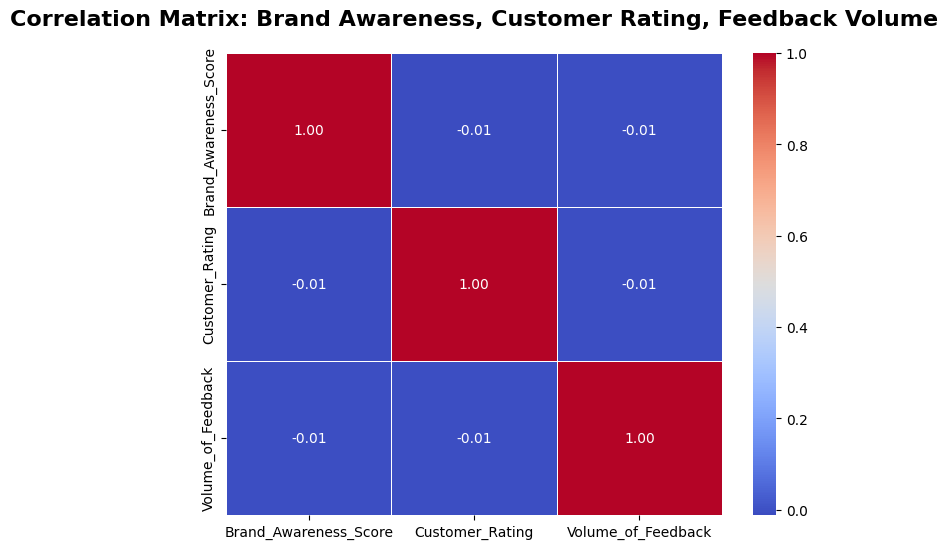

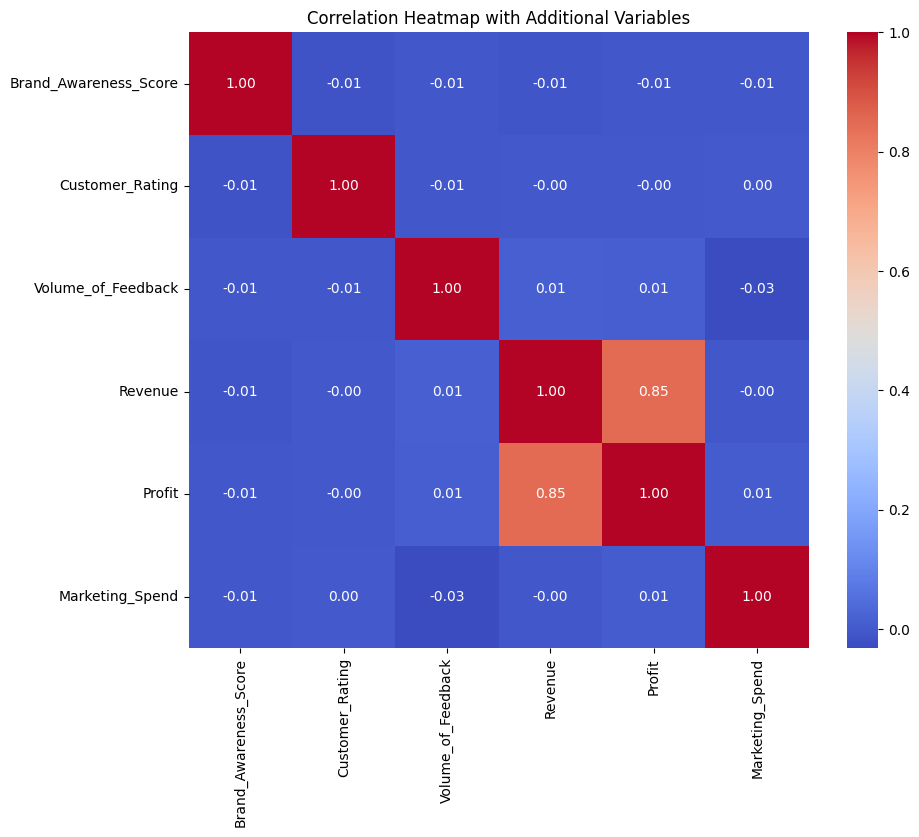

C:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


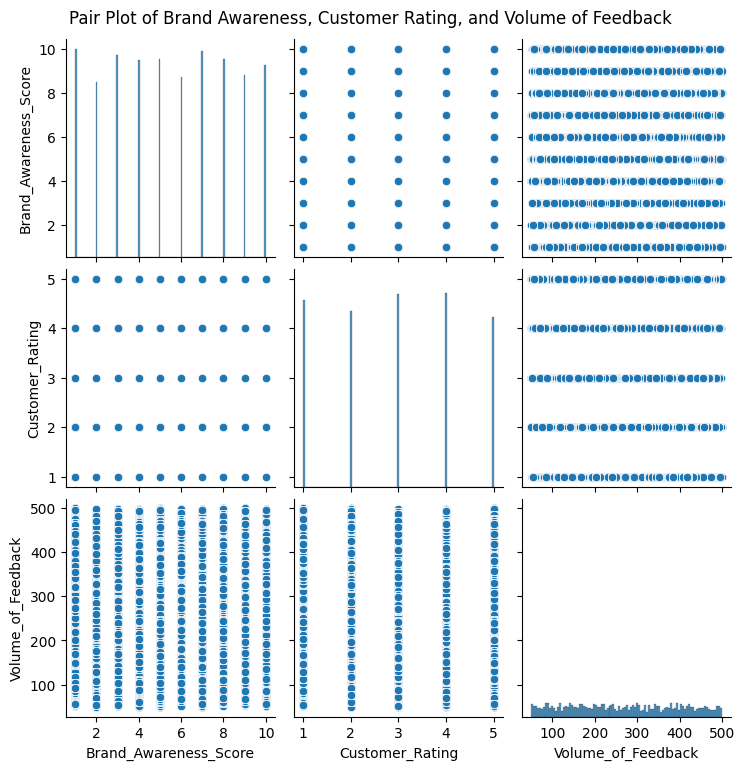

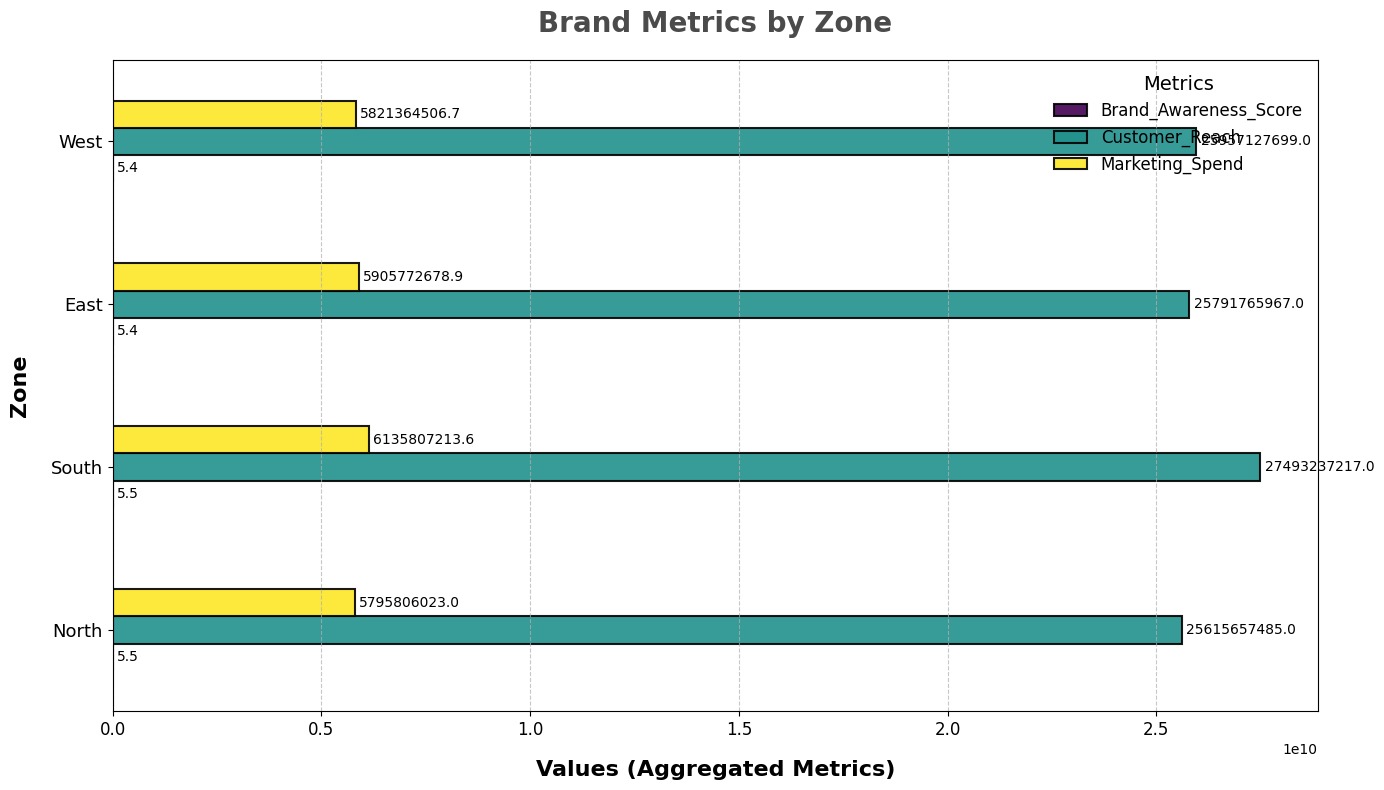

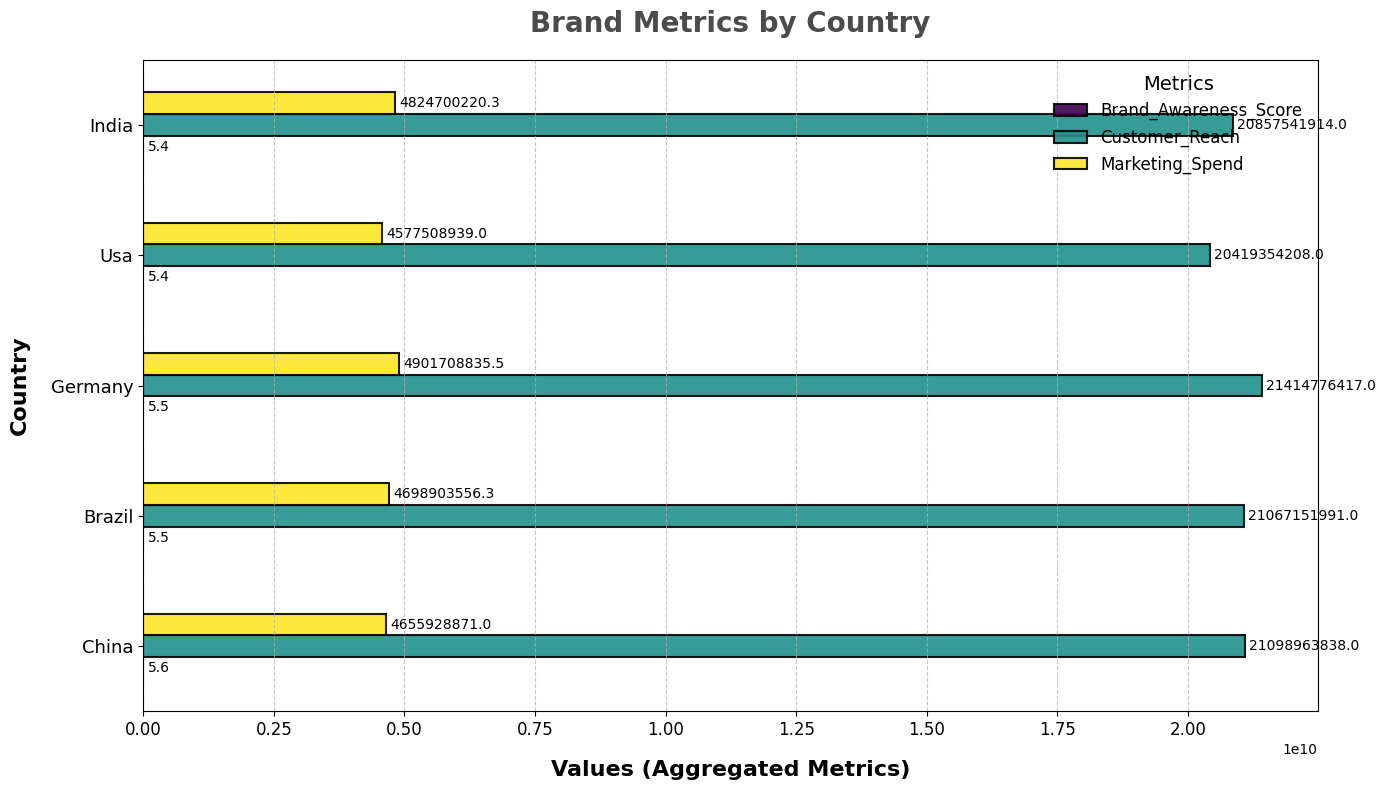

In [8]:
analyze_brand(merged_data)

In [9]:
## ---Brand Popularity Analysis---
def analyze_brand_popularity(data):
    # Brand Popularity by Zone
    popularity_by_zone = data.groupby('Zone').agg({
        'Customer_Rating': 'mean',
        'Volume_of_Feedback': 'sum'
    }).sort_values(by='Customer_Rating', ascending=False)

    plt.figure(figsize=(14, 8))
    sns.barplot(x=popularity_by_zone.index, y=popularity_by_zone['Customer_Rating'], palette="Blues_d", 
                edgecolor='black', linewidth=1.5)
    plt.title("Average Customer Rating by Zone", fontsize=18, fontweight='bold', color='black', pad=20)
    plt.xlabel("Zone", fontsize=14, fontweight='bold', labelpad=15)
    plt.ylabel("Average Customer Rating", fontsize=14, fontweight='bold', labelpad=15)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    for i, v in enumerate(popularity_by_zone['Customer_Rating']):
        plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 5.0)
    plt.tight_layout()
    plt.show()

    # Total Volume of Feedback by Zone
    plt.figure(figsize=(14, 8))
    sns.barplot(x=popularity_by_zone['Volume_of_Feedback'], y=popularity_by_zone.index, palette="Greens_d")
    plt.title("Total Volume of Feedback by Zone", fontsize=18, fontweight='bold', color='darkgreen', pad=20)
    plt.xlabel("Total Volume of Feedback", fontsize=16, fontweight='bold', labelpad=15)
    plt.ylabel("Zone", fontsize=16, fontweight='bold', labelpad=15)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    for i, v in enumerate(popularity_by_zone['Volume_of_Feedback']):
        plt.text(v - 0.5, i, f'{v}', color='white', ha="right", va="center", fontsize=12, fontweight='bold')
        
    plt.tight_layout()
    plt.show()

    # Brand Popularity by Country
    popularity_by_country = data.groupby('Country').agg({
        'Customer_Rating': 'mean',
        'Volume_of_Feedback': 'sum'
    }).sort_values(by='Customer_Rating', ascending=False)
    
    # Average Customer Rating by Country
    plt.figure(figsize=(14, 8))
    sns.barplot(x=popularity_by_country.index, y=popularity_by_country['Customer_Rating'], palette="Blues_d", 
                edgecolor='black', linewidth=1.5)
    plt.title("Average Customer Rating by Country", fontsize=18, fontweight='bold', color='black', pad=20)
    plt.xlabel("Country", fontsize=14, fontweight='bold', labelpad=15)
    plt.ylabel("Average Customer Rating", fontsize=14, fontweight='bold', labelpad=15)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    for i, v in enumerate(popularity_by_country['Customer_Rating']):
        plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 5.0)
    plt.tight_layout()
    plt.show()
    
    # Total Volume of Feedback by Country
    plt.figure(figsize=(14, 8))
    sns.barplot(x=popularity_by_country['Volume_of_Feedback'], y=popularity_by_country.index, palette="Greens_d", 
                edgecolor='black', linewidth=1.5)
    
    plt.title("Total Volume of Feedback by Country", fontsize=18, fontweight='bold', color='black', pad=20)
    plt.xlabel("Total Volume of Feedback", fontsize=14, fontweight='bold', labelpad=15)
    plt.ylabel("Country", fontsize=14, fontweight='bold', labelpad=15)
    for i, v in enumerate(popularity_by_country['Volume_of_Feedback']):
        plt.text(v, i, f'{v}', ha='right', va='center', fontsize=12, fontweight='bold', color='white')
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


    # Sentiment Analysis (Feedback Type)
    # Sentiment analysis by zone
    sentiment_by_zone = data.groupby(['Zone', 'Feedback_Type']).agg({
        'Volume_of_Feedback': 'sum'
    }).unstack().fillna(0)

    plt.figure(figsize=(14, 8))
    sentiment_by_zone.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="coolwarm", edgecolor='black', linewidth=1.5)
    plt.title("Feedback Sentiment (Positive/Negative) by Zone", fontsize=18, fontweight='bold', color='black', pad=20)
    plt.xlabel("Zone", fontsize=14, fontweight='bold', labelpad=15)
    plt.ylabel("Volume of Feedback", fontsize=14, fontweight='bold', labelpad=15)
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:
            plt.text(p.get_x() + p.get_width() / 2, p.get_y() + height + 0.05, f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title="Feedback Type", fontsize=12, title_fontsize=14, loc='upper left')
    plt.tight_layout()
    plt.show()

    # Sentiment analysis by country
    sentiment_by_country = data.groupby(['Country', 'Feedback_Type']).agg({
        'Volume_of_Feedback': 'sum'
    }).unstack().fillna(0)
    
    plt.figure(figsize=(14, 8))
    sentiment_by_country.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="coolwarm", edgecolor='black', linewidth=1.5)
    plt.title("Feedback Sentiment (Positive/Negative) by Country", fontsize=18, fontweight='bold', color='black', pad=20)
    plt.xlabel("Country", fontsize=14, fontweight='bold', labelpad=15)
    plt.ylabel("Volume of Feedback", fontsize=14, fontweight='bold', labelpad=15)
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:
            plt.text(p.get_x() + p.get_width() / 2, p.get_y() + height + 0.05, f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title="Feedback Type", fontsize=12, title_fontsize=14, loc='upper left')
    plt.tight_layout()
    plt.show()

    # Customer Rating by Product Category
    avg_rating_by_category = data.groupby('Product_Category').agg({
        'Customer_Rating': 'mean'
    }).sort_values(by='Customer_Rating', ascending=False)

    plt.figure(figsize=(14, 8))
    sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category['Customer_Rating'], 
                palette="Set2", edgecolor='black', linewidth=1.5)
    plt.title("Average Customer Rating by Product Category", fontsize=18, fontweight='bold', color='black', pad=20)
    plt.xlabel("Product Category", fontsize=14, fontweight='bold', labelpad=15)
    plt.ylabel("Average Customer Rating", fontsize=14, fontweight='bold', labelpad=15)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylim(0, 5.0)
    for i, v in enumerate(avg_rating_by_category['Customer_Rating']):
        plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Customer Rating and Feedback Volume by Product Category
    feedback_by_category = data.groupby('Product_Category').agg({
        'Volume_of_Feedback': 'sum'
    }).sort_values(by='Volume_of_Feedback', ascending=False)

    plt.figure(figsize=(14, 8))
    sns.barplot(x=feedback_by_category.index, y=feedback_by_category['Volume_of_Feedback'], 
                palette="cubehelix", edgecolor='black', linewidth=1.5)
    plt.title("Total Volume of Feedback by Product Category", fontsize=18, fontweight='bold', color='black', pad=20)
    plt.xlabel("Product Category", fontsize=14, fontweight='bold', labelpad=15)
    plt.ylabel("Total Volume of Feedback", fontsize=14, fontweight='bold', labelpad=15)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    for i, v in enumerate(feedback_by_category['Volume_of_Feedback']):
        plt.text(i, v + 0.05, f'{v}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

C:\Users\suraj\AppData\Local\Temp\ipykernel_25300\4164686406.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_by_zone.index, y=popularity_by_zone['Customer_Rating'], palette="Blues_d",


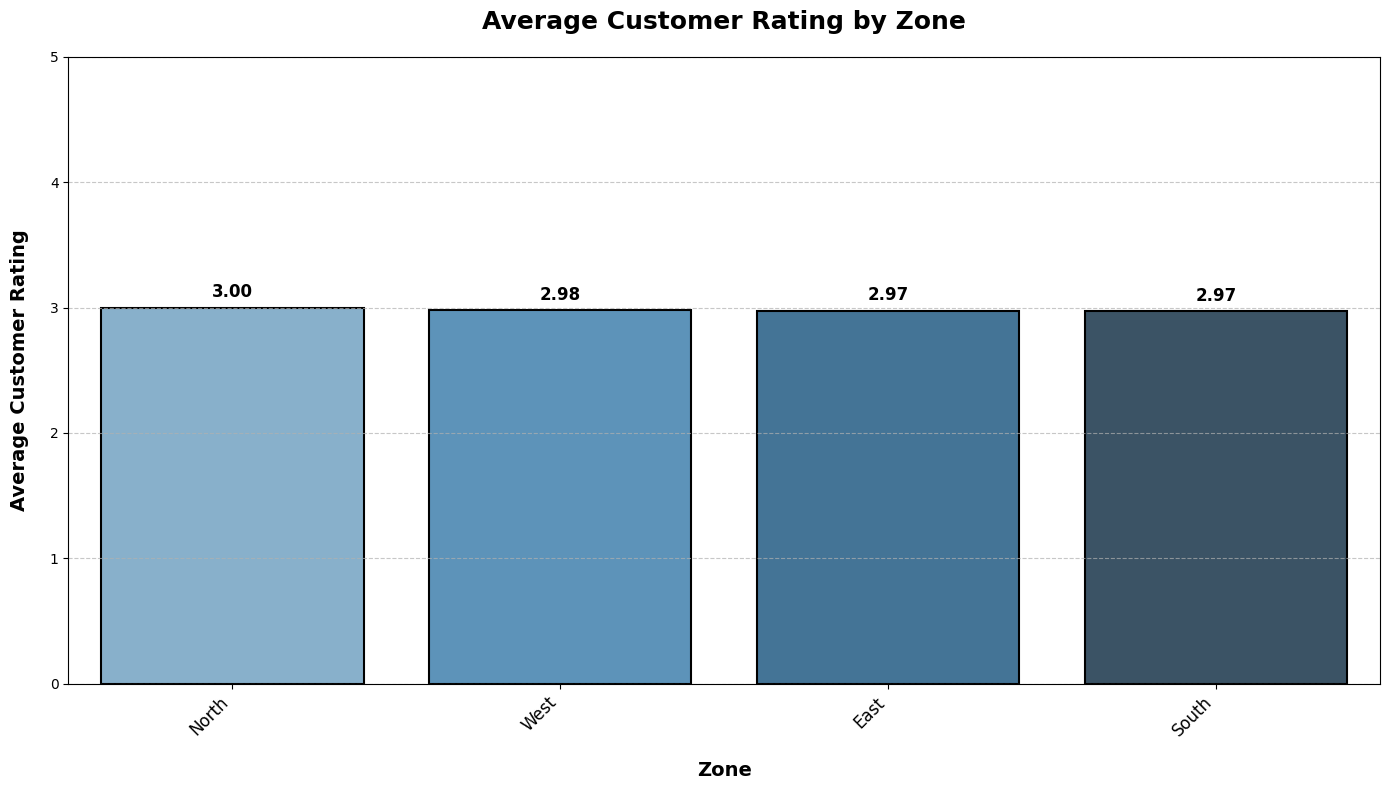

C:\Users\suraj\AppData\Local\Temp\ipykernel_25300\4164686406.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_by_zone['Volume_of_Feedback'], y=popularity_by_zone.index, palette="Greens_d")


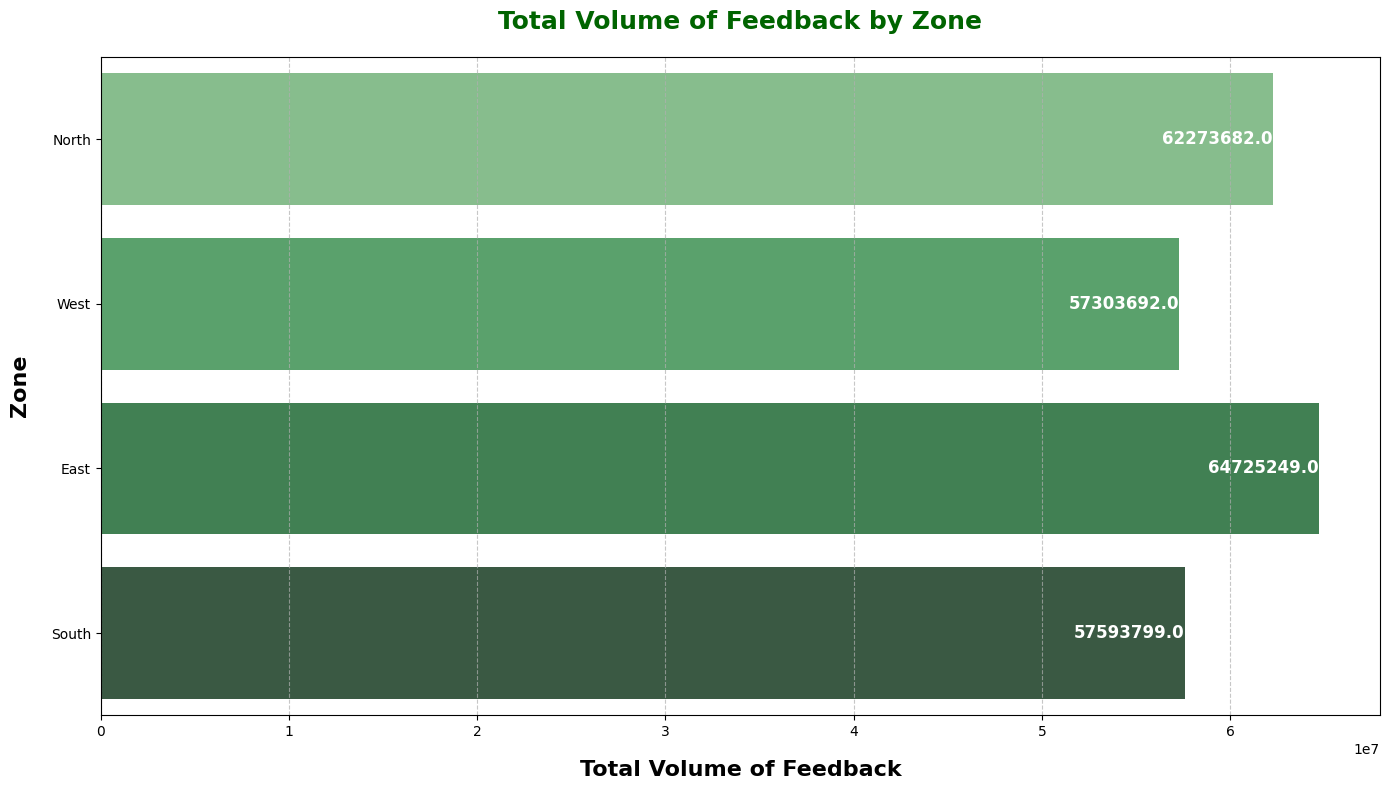

C:\Users\suraj\AppData\Local\Temp\ipykernel_25300\4164686406.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_by_country.index, y=popularity_by_country['Customer_Rating'], palette="Blues_d",


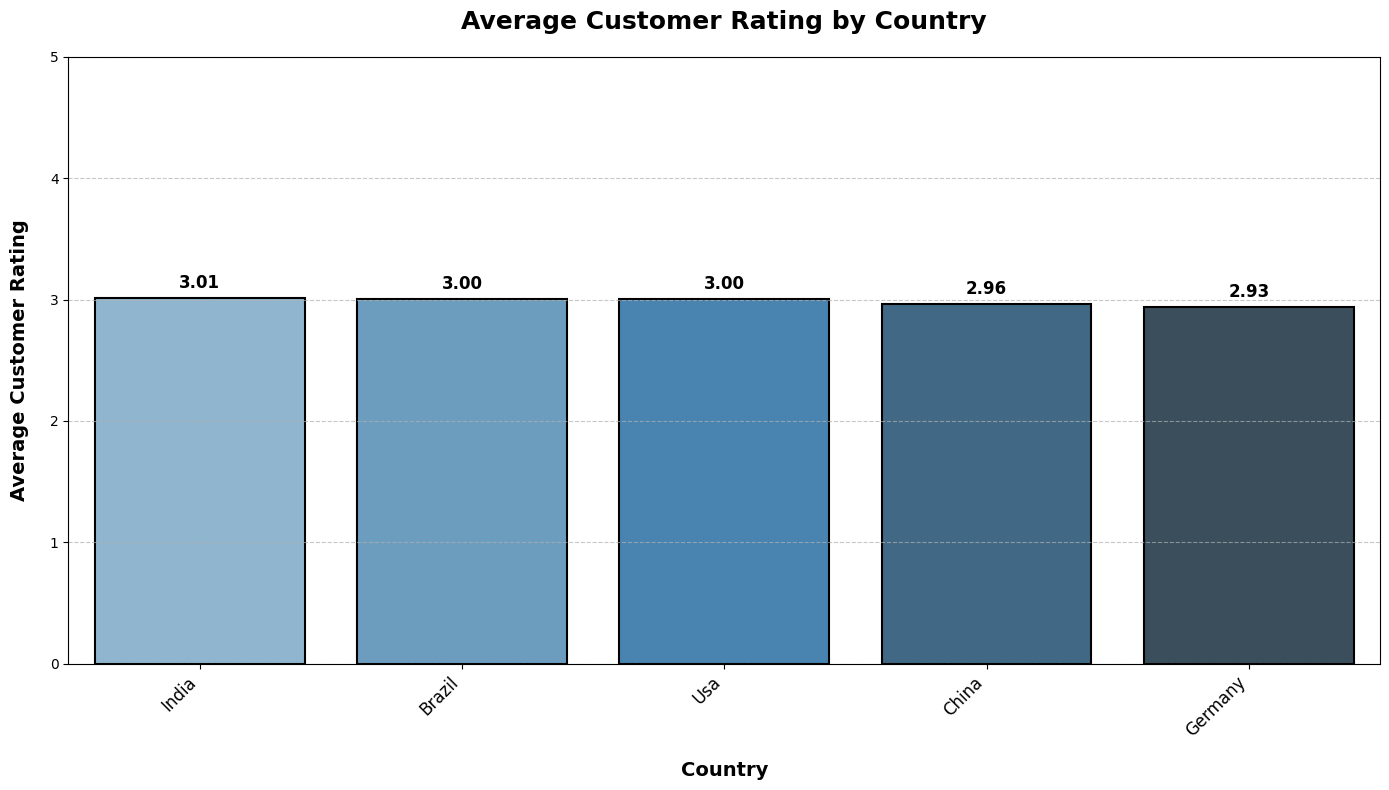

C:\Users\suraj\AppData\Local\Temp\ipykernel_25300\4164686406.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_by_country['Volume_of_Feedback'], y=popularity_by_country.index, palette="Greens_d",


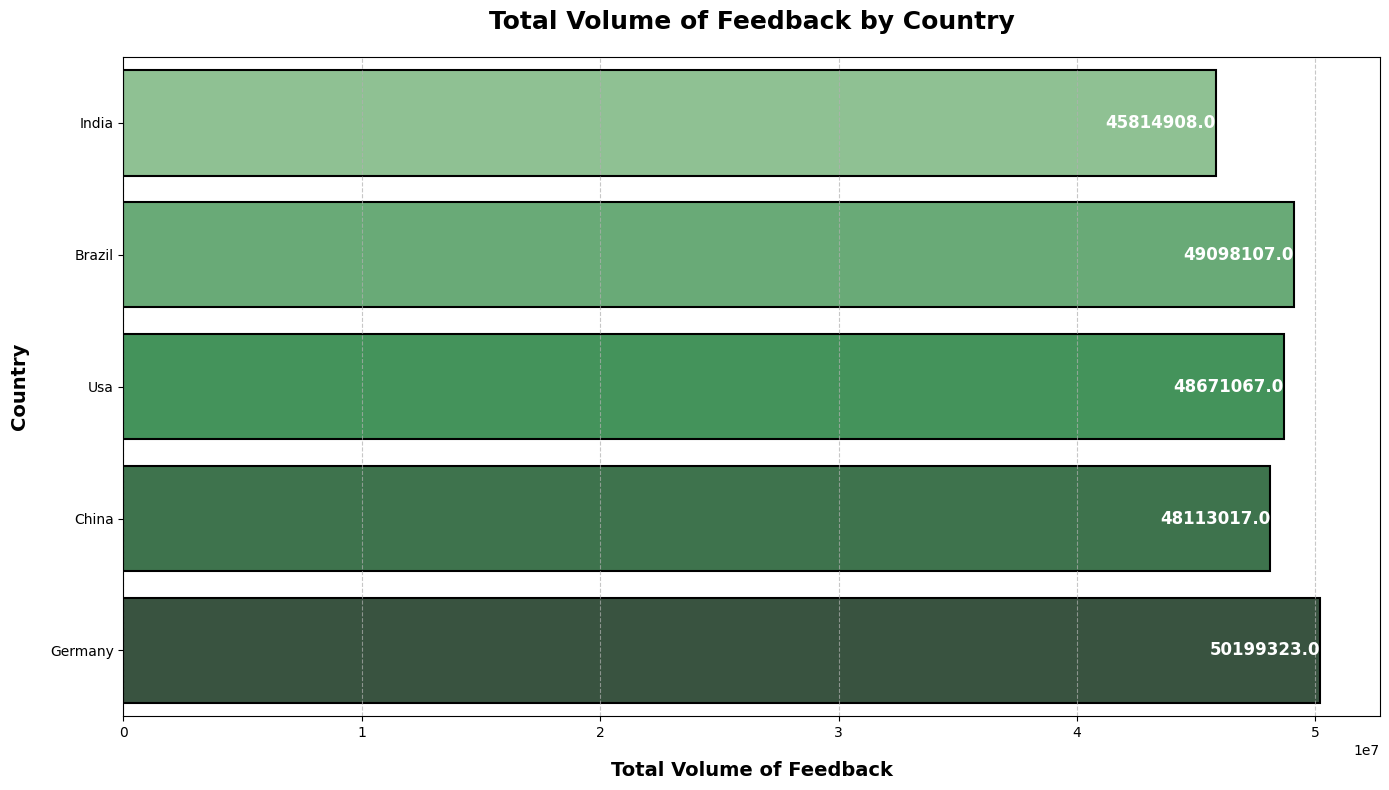

<Figure size 1400x800 with 0 Axes>

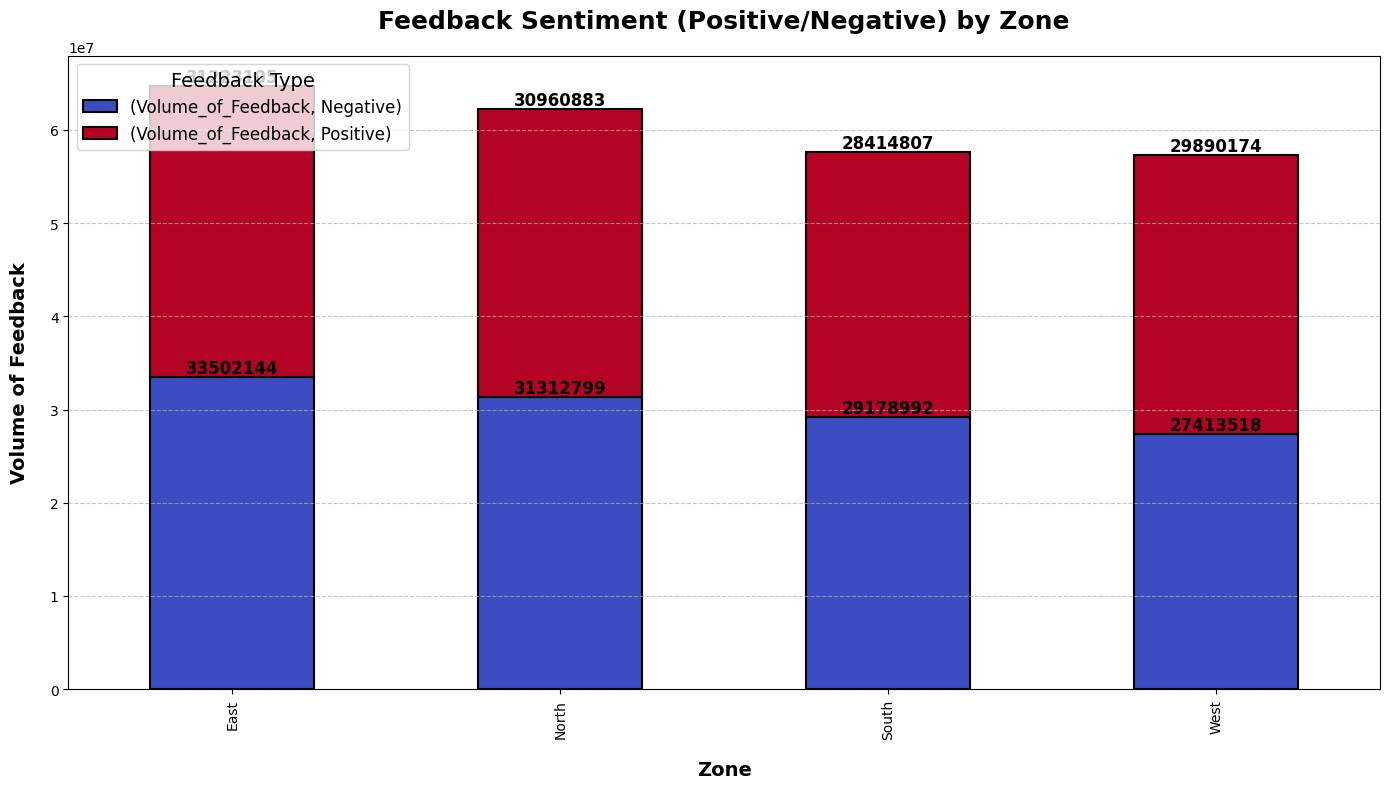

<Figure size 1400x800 with 0 Axes>

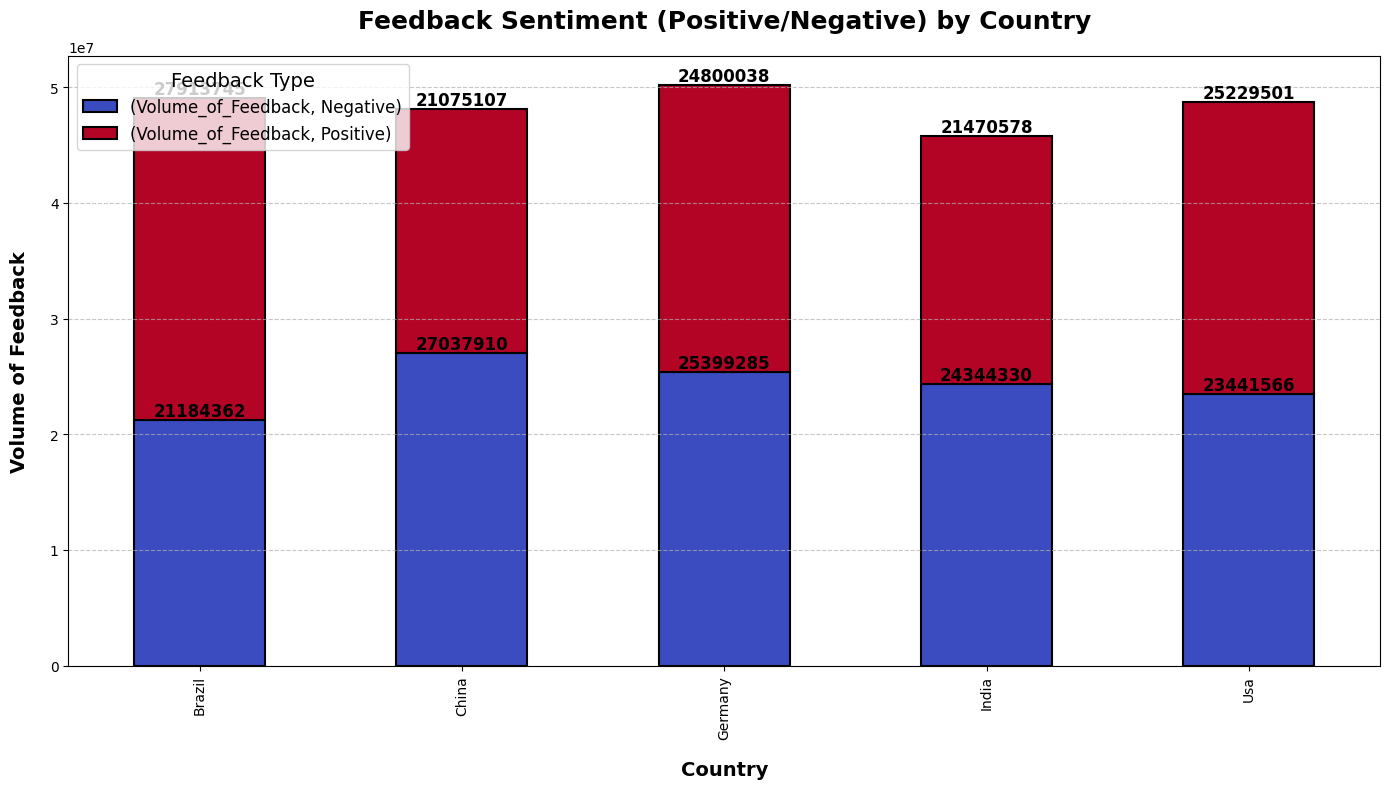

C:\Users\suraj\AppData\Local\Temp\ipykernel_25300\4164686406.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category['Customer_Rating'],


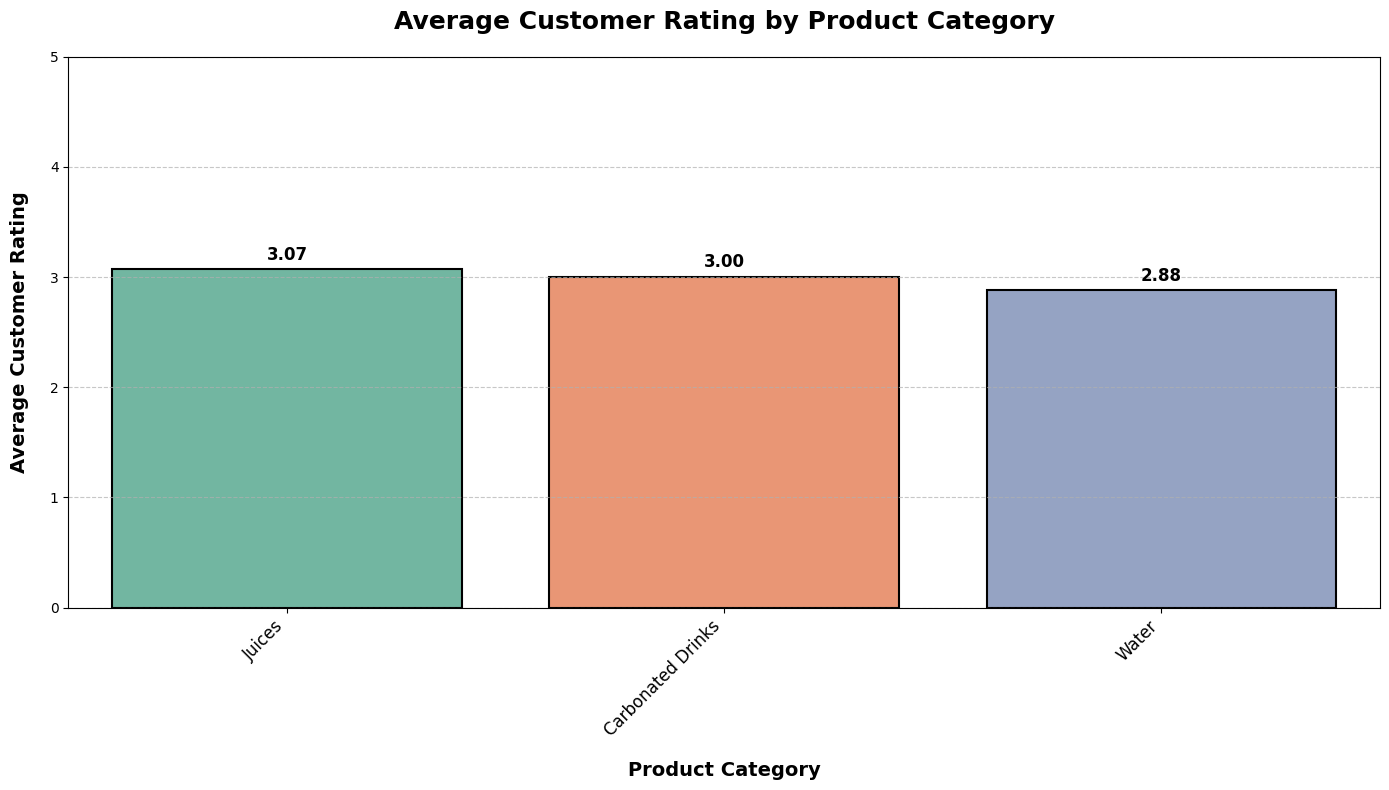

C:\Users\suraj\AppData\Local\Temp\ipykernel_25300\4164686406.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feedback_by_category.index, y=feedback_by_category['Volume_of_Feedback'],


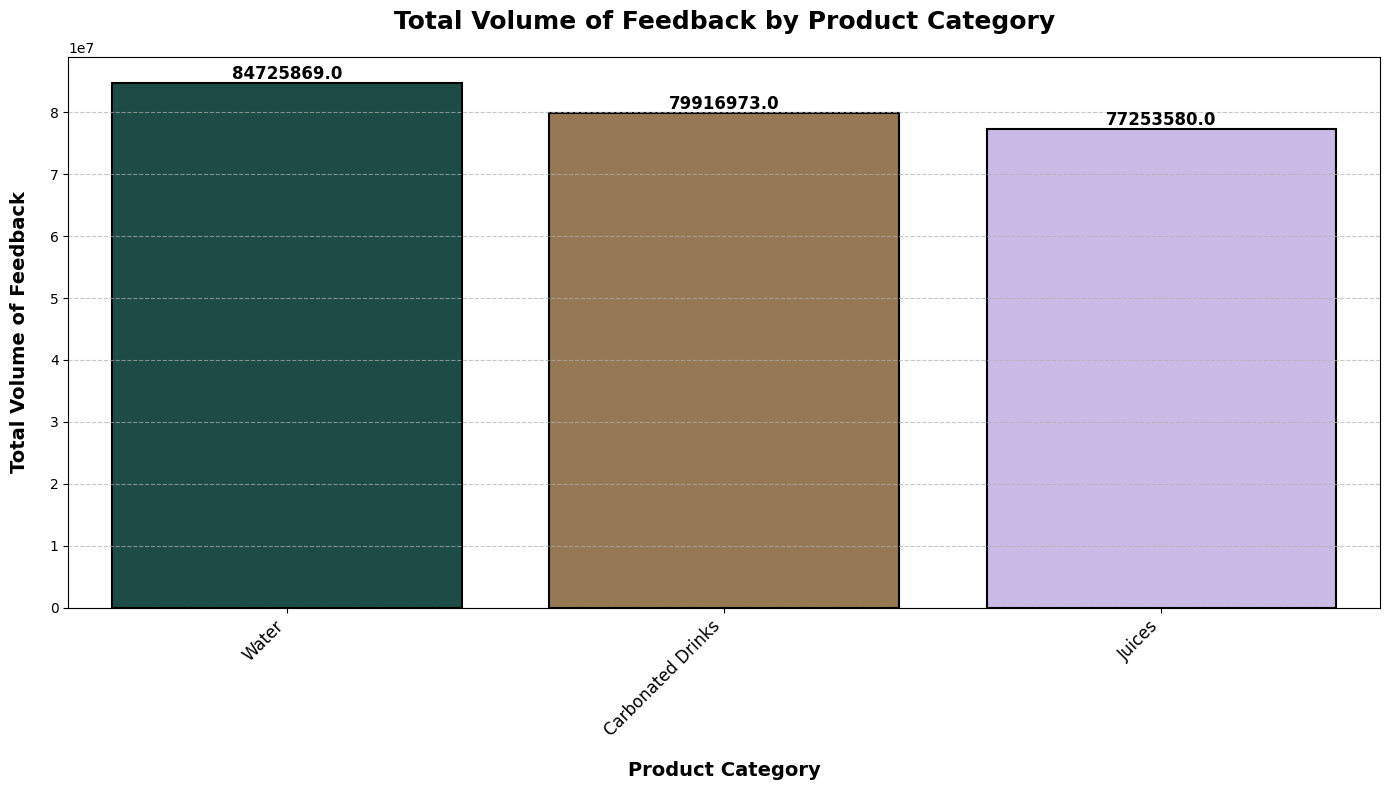

In [10]:
analyze_brand_popularity(merged_data)

In [11]:
# file_path = "C:/Users/suraj/Desktop/work/Code/Command Centre Dataset.xlsx"
# sales_data = pd.read_excel(file_path, sheet_name='Sales_Data')
# marketing_data = pd.read_excel(file_path, sheet_name='Marketing_Data')
# feedback_data = pd.read_excel(file_path, sheet_name='Customer_Feedback_Data')
# competitor_data = pd.read_excel(file_path, sheet_name='Competitor_Data')

# # Clean and merge datasets
# #cleaned_data = clean_and_merge_datasets(sales_data, marketing_data, feedback_data, competitor_data)

# #output_file = 'cleaned_individual_sheets.xlsx'
# clean_and_save_individual_sheets(sales_data, marketing_data, feedback_data, competitor_data, output_file)

In [12]:
## 
def competitive_analysis(merged_data):
    # Pricing Comparison
    merged_data['Product_Price'] = merged_data['Revenue'] / merged_data['Units_Sold']
    pricing_comparison = merged_data.groupby('Product_Category')[['Product_Price']].mean()
    competitor_prices = merged_data.groupby(['Product_Category', 'Competitor_Name'])[['Competitor_Price']].mean().unstack()
    pricing_comparison = pd.concat([pricing_comparison, competitor_prices['Competitor_Price']], axis=1)
    pricing_comparison.columns = ['Our Price', 'Competitor_A', 'Competitor_B', 'Competitor_C']

    plt.figure(figsize=(18, 18))
    pricing_comparison.plot(kind='bar', colormap='Set2', edgecolor='black', linewidth=1.5)
    plt.title("Pricing Comparison: Our Price vs Competitor Price", fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("Product Category", fontsize=14, fontweight="bold", labelpad=15)
    plt.ylabel("Average Price", fontsize=14, fontweight="bold", labelpad=15)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title="Pricing", fontsize=5)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Market Share Comparison(for Competitor)
    market_share_comparison = merged_data.groupby('Product_Category')[['Competitor_Market_Share']].mean()
    competitor_data = merged_data[merged_data['Competitor_Name'].isin(['Competitor_A', 'Competitor_B', 'Competitor_C'])]
    market_share_comparison = competitor_data.pivot_table(
        index='Product_Category', 
        columns='Competitor_Name', 
        values='Competitor_Market_Share', 
        aggfunc='mean'
    )
    
    plt.figure(figsize=(14, 8))
    ax = market_share_comparison.plot(
        kind='bar', 
        stacked=False, 
        figsize=(14, 8), 
        colormap="coolwarm", 
        edgecolor='black', 
        linewidth=1.5
    )
    
    plt.title("Market Share Comparison: Competitor A, B, and C", fontsize=18, fontweight="bold", pad=20, color='black')
    plt.xlabel("Product Category", fontsize=14, fontweight='bold', labelpad=15)
    plt.ylabel("Market Share (%)", fontsize=14, fontweight='bold', labelpad=15)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title="Competitors", fontsize=7)
    plt.tight_layout()
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', fontweight='bold', 
                    xytext=(0, 5), textcoords='offset points')
    
    plt.show()

    # Market Share Comparison
    total_market_revenue = merged_data.groupby('Product_Category').apply(
    lambda x: x['Revenue'].sum() + (x['Competitor_Price'] * x['Units_Sold']).sum())

    our_market_revenue = merged_data.groupby('Product_Category')['Revenue'].sum()
    our_market_share = (our_market_revenue / total_market_revenue) * 100
    our_market_share = our_market_share.rename("Our Market Share")

    competitor_market_revenue = merged_data.groupby(['Product_Category', 'Competitor_Name']).apply(
        lambda x: (x['Competitor_Price'] * x['Units_Sold']).sum()
    ).unstack()
    competitor_market_share = (competitor_market_revenue.div(total_market_revenue, axis=0)) * 100
    market_share_comparison = pd.concat([our_market_share, competitor_market_share], axis=1)

    plt.figure(figsize=(14, 8))
    market_share_comparison.plot(
        kind='bar',
        colormap='Set3',
        edgecolor='black',
        linewidth=1.5
    )
    plt.title("Market Share Comparison: Our Product vs Competitors", fontsize=18, fontweight="bold", pad=20, color='black')
    plt.xlabel("Product Category", fontsize=14, fontweight='bold', labelpad=15)
    plt.ylabel("Market Share (%)", fontsize=14, fontweight='bold', labelpad=15)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title="Market Share", fontsize=10)
    plt.tight_layout()
    plt.show()

<Figure size 1800x1800 with 0 Axes>

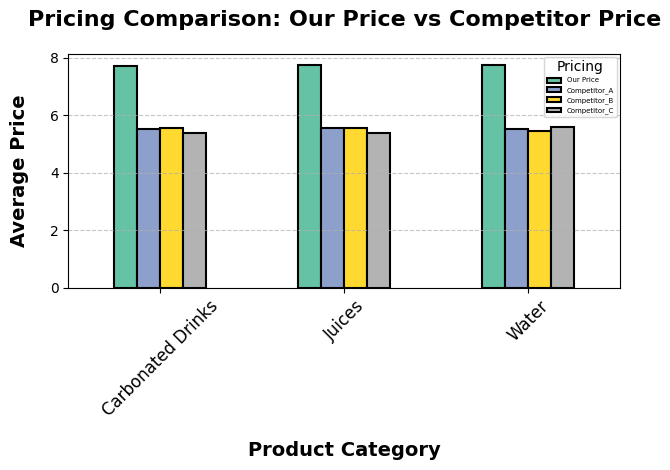

<Figure size 1400x800 with 0 Axes>

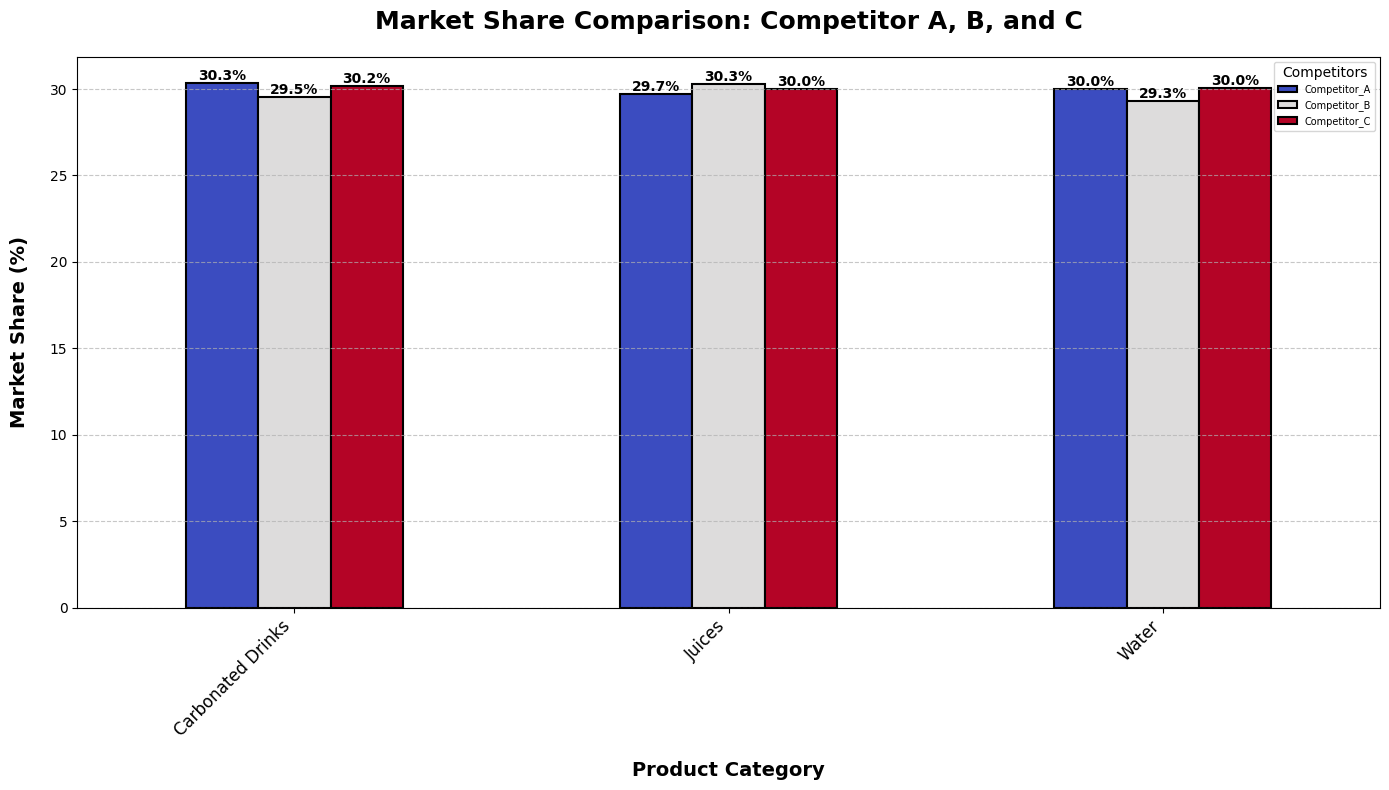

<Figure size 1400x800 with 0 Axes>

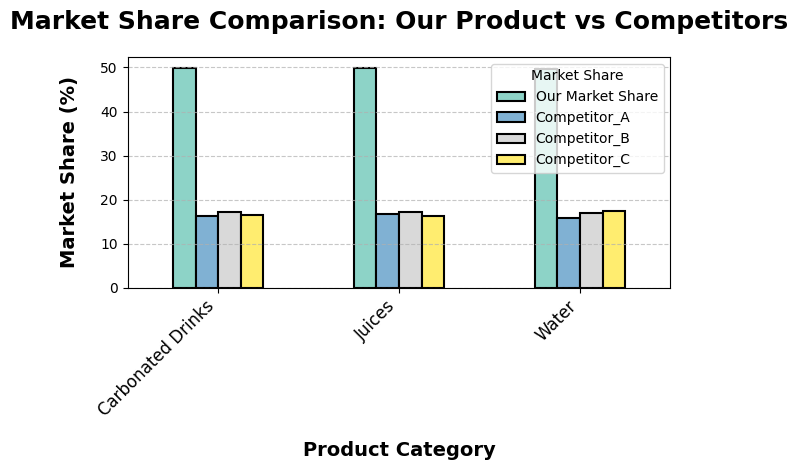

In [13]:
competitive_analysis(merged_data)